## Implementation of Linear regression using python

In [1]:
### import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Load the dataset

In [4]:
df=pd.read_csv("Food_Delivery_Times.csv")
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


### Standardize numerical features

In [5]:
# Drop rows with missing values in the core columns used for the model
df_cleaned = df.dropna(subset=['Distance_km', 'Weather', 'Traffic_Level', 'Delivery_Time_min'])

# 2. Prepare Independent Variables (X)
X = df_cleaned[['Distance_km', 'Weather', 'Traffic_Level']].copy()

# One-Hot Encoding for categorical features
X = pd.get_dummies(X, columns=['Weather', 'Traffic_Level'], drop_first=True)

# Standardization for the numerical feature (Distance_km)
col = ["Distance_km"]
S1 = MinMaxScaler()
X[col] = S1.fit_transform(X[col])

# 3. Prepare Dependent Variable (y)
y = df_cleaned['Delivery_Time_min']


## Prepare dependant and independant variables

In [6]:
X=df[["Distance_km"]].to_numpy()
Y=df[["Delivery_Time_min"]].to_numpy()
Y.shape

(1000, 1)

## Split the data into training and test set

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [8]:
# Create a linear regression model

model=LinearRegression()



Note: Learning more about Linear Regression model here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [9]:
## Training  Linear regressions model

In [10]:
model.fit(X_train,Y_train)

LinearRegression()

In [15]:
# --- Import Libraries ---
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Model Prediction & Evaluation ---
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Print model coefficients and intercept
print("Coefficients:", model.coef_[0])
print("Intercept:", model.intercept_)

# --- 2. Manual Implementation of Gradient Descent ---
# Re-Define Variables from Previous Steps (if restarting)
# Assuming X_train, Y_train are defined from train_test_split
# Example shapes: X_train (658, 7), Y_train (658, 1)

# Add intercept term (column of 1s)
X_train_bias = np.insert(X_train, 0, 1, axis=1)

# Initialize Hyperparameters and Parameters
epochs = 1000
learningrate = 0.01
m = X_train_bias.shape[0]             # Number of training samples
n_features = X_train_bias.shape[1]    # Number of features + intercept (8)

# Initialize theta (weights)
theta = np.zeros((n_features, 1))

# Store MSE history for plotting
MSEH = []

# --- Gradient Descent Loop ---
for i in range(epochs):
    # Prediction: Y_pred = X_train_bias * theta
    Y_pred = np.dot(X_train_bias, theta)

    # Compute Mean Squared Error
    MSE = mean_squared_error(Y_train, Y_pred)
    MSEH.append(MSE)

    # Compute Gradient
    gradient = (1/m) * np.dot(X_train_bias.T, (Y_pred - Y_train))

    # Update Parameters
    theta = theta - learningrate * gradient

# Print Final Results
print(f"\nFinal theta (coefficients + intercept) after {epochs} epochs:")
print(theta)
print(f"Final MSE: {MSEH[-1]:.2f}")


Mean Squared Error: 162.43893153356927
R² Score: 0.675575890910683
Coefficients: [2.93124486]
Intercept: [27.50788861]

Final theta (coefficients + intercept) after 1000 epochs:
[[24.97276172]
 [ 3.12158907]]
Final MSE: 203.59


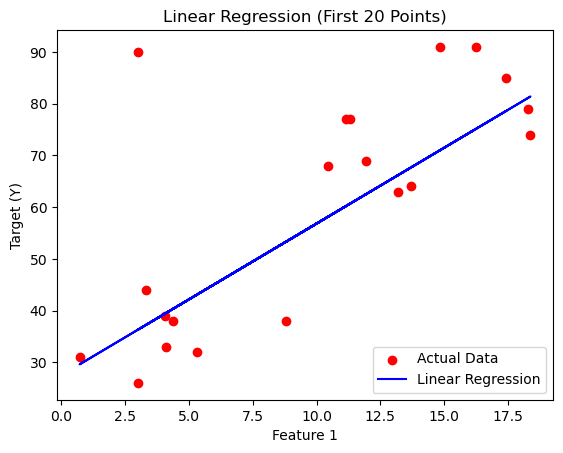

In [16]:
import matplotlib.pyplot as plt

# Predict values
Y_pred = model.predict(X_test)

# Plot the first 20 points
plt.scatter(X_test[:20, 0], Y_test[:20], color="red", label="Actual Data")
plt.plot(X_test[:20, 0], Y_pred[:20], color="blue", label="Linear Regression")

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Target (Y)")
plt.title("Linear Regression (First 20 Points)")
plt.legend()
plt.show()


# Gradient descent Scrath implementations

In [17]:
## Load the Height and weight  to indipendent and dependent variable

In [18]:
df1=pd.read_csv("Food_Delivery_Times.csv")
X=df1[["Distance_km"]].to_numpy()
Y=df1["Delivery_Time_min"].values





## 🧠 Z-Score Normalization (Standardization)

The **Z-score** (or **standard score**) measures how many standard deviations a data point is from the mean.

### 📘 Formula

$$
Z = \frac{X - \mu}{\sigma}
$$




In [19]:
## Standardizes the features X and target variable y using Z-score normalization (also called Standardization).
X=(X-np.mean(X))/np.std(X)
Y=(Y-np.mean(Y))/np.std(Y)
Y.shape

(1000,)

In [20]:
## add another feature to X corresponding to bias
X=np.hstack((np.ones((X.shape[0],1)),X))
X.shape


(1000, 2)

In [21]:
epochs = 1000
learningrate = 0.01
m = X_train_bias.shape[0]  # Number of training examples
n_features = X_train_bias.shape[1] # Number of features + intercept (8)

# Initialize theta (parameters/weights)
theta = np.zeros((n_features, 1))

# Initialize list to store Mean Squared Error history
MSEH = []



<img src="https://i.postimg.cc/wMYVXD65/1.png" alt="Image Description" width="500">

Final θ (weights + intercept):
 [[1.37936190e-17]
 [1.37936190e-17]
 [7.80964642e-01]]
Final MSE: 0.39004156499936143


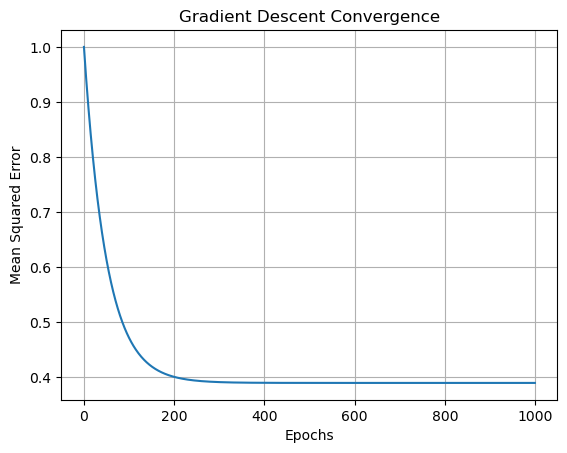

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --- Prepare Data ---
# Ensure Y is a column vector
Y = Y.reshape(-1, 1)

# Add bias (intercept) term to X
X = np.insert(X, 0, 1, axis=1)

# --- Initialize Parameters ---
epochs = 1000
learningrate = 0.01
m = X.shape[0]   # number of samples
n = X.shape[1]   # number of features (including bias)

theta = np.zeros((n, 1))  # parameters (weights + intercept)
MSEH = []                 # store MSE for each epoch

# --- Gradient Descent Loop ---
for i in range(epochs):
    # Prediction
    Y_pred = np.dot(X, theta)            # shape (m, 1)

    # Compute Mean Squared Error
    MSE = mean_squared_error(Y, Y_pred)
    MSEH.append(MSE)

    # Compute Gradient
    gradient = (1/m) * np.dot(X.T, (Y_pred - Y))

    # Update Parameters
    theta = theta - learningrate * gradient

# --- Final Results ---
print("Final θ (weights + intercept):\n", theta)
print("Final MSE:", MSEH[-1])

# --- Optional: Plot MSE over Epochs ---
plt.plot(MSEH)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

    

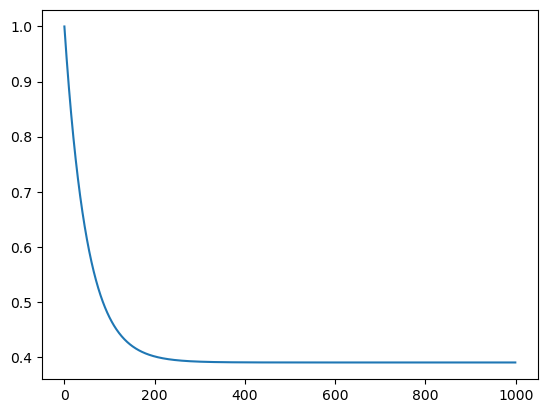

In [24]:
# Loss graph
plt.plot(MSEH)

## You are required to fit a linear function on Food_delivery_times dataset
Description about the dataset: This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and Preperation time.
1. Feature selection: Consider Food_delivery_time is effected by four features (attributes) given in the dataset, which are Distance_km, Preparation_Time_min, Traffic, Weather
2. Since Traffic, Weather are having categorical values, you need to convert them into numerical using the categorical encoding methods.
3. Now, fit a linear regression model considering Distance_km, Preparation_Time_min, Traffic, and Weather as independant variables and Delivery_Time_min as dependant varibal.


Note: In lab record, you can write the statements relevant to linear regression.